# Анализ клиентов банка на благонадежность




In [2]:
from tqdm import tqdm_notebook as tqdm
import time

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
path_loc = 'loan.csv'

In [133]:
url =  'https://www.kaggle.com/mrferozi/loan-data-for-dummy-bank/download'
path = 'C:\loan2.csv'
#data = pd.read_csv(url, sep=',', header=None,  engine='python')
data = pd.read_csv(path, sep = ',', header=None, engine = 'python')

In [5]:
data = pd.read_csv(path_loc, sep = ',', header=0, engine = 'python')


In [6]:
data.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


 
 Data Description
LoanStatNew Description


 
 - `year`, год
 - `issue_d`, начальная дата
 - `final_d`, конечная дата
 - `emp_length_int`,   Срок трудоустройства. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
 - `home_ownership`, The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
 
 - `home_ownership_cat`, RENT, OWN, MORTGAGE, OTHER.
 - `income_category`, low, medium, high
 - `annual_inc`, The self-reported annual income provided by the borrower during registration.
 
 - `income_cat`, low, medium, high в цифре
 - `loan_amount`, величина заема
 - `term`, срок 
 - `term_cat`, 36 - 1 кат, 60 - 2 кат
 - `application_type`, все Индивидуал
 - `application_type_cat`, все Индивидуал -1
 - `purpose`, цель заема
 - `purpose_cat`, категория цели заема
 - `interest_payments`, выплаты процентов : много, мало
 - `interest_payment_cat`,выплаты процентов  мало - 1, много - 2
 - `loan_condition`, Good loan - 0, Bad Loan - 1
 - `loan_condition_cat`, Good loan - 0, Bad Loan - 1
 - `interest_rate`, - процетная ставка
 - `grade`, Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of collateral and likelihood of repayment of the principal and interest. A score can also be applied to a portfolio of loans.
 
 - `grade_cat`, от 1 до 7. Уточнить что лучше
 - `dti`,  отношение долга к доходам. В России DTI называют предельной долговой нагрузкой (ПДН). Это процент вашего ежемесячного дохода, который идет на оплату кредитов. В прочем, не только кредитов. Часто в DTI закладывают также все обязательные платежи. Например, коммунальную плату, страховые взносы, обязательства перед операторами сотовой связи, словом все, что вы должны заплатить обязательно.
 
 - `total_pymnt` - сколько в итоге заплатил заемщик
 - `total_rec_prncp`,
 - `recoveries`, последующие взыскания?
 - `installment`'  - сколько платить в месяц


In [7]:
print(data.shape)
print(data.columns)

(887379, 30)
Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')


In [48]:
data.describe()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,2014.021761,1.047089e+06,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,2.282734e+07,1.261741,4.555149e+04,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,5.473400e+04,2007.000000,1.012008e+06,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,9.206643e+06,2013.000000,1.012016e+06,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,3.443327e+07,2014.000000,1.012016e+06,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,5.490814e+07,2015.000000,1.092015e+06,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,6.861706e+07,2015.000000,1.122015e+06,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


In [52]:
data[[
 'year',
 #'issue_d',
 #'final_d', - дата не через запятую
 'emp_length_int',
 #'home_ownership',
 'home_ownership_cat',
 #'income_category',
 'annual_inc',
 'income_cat',
 'loan_amount',
 #'term',
 'term_cat',
 #'application_type',
 'application_type_cat',
 #'purpose',
 'purpose_cat',
 #'interest_payments',
 'interest_payment_cat',
 #'loan_condition',
 'loan_condition_cat',
 'interest_rate',
 #'grade',
 'grade_cat',
 'dti',
 'total_pymnt',
 'total_rec_prncp',
 'recoveries',
 'installment',
 'region'
]].head(5)

,year,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2011,10.0,1,24000,1,5000,1,1,1,1,0,10.65,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,2011,0.5,1,30000,1,2500,2,1,2,2,1,15.27,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,2011,10.0,1,12252,1,2400,1,1,3,2,0,15.96,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,2011,10.0,1,49200,1,10000,1,1,4,2,0,13.49,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,2011,1.0,1,80000,1,3000,2,1,4,1,0,12.69,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


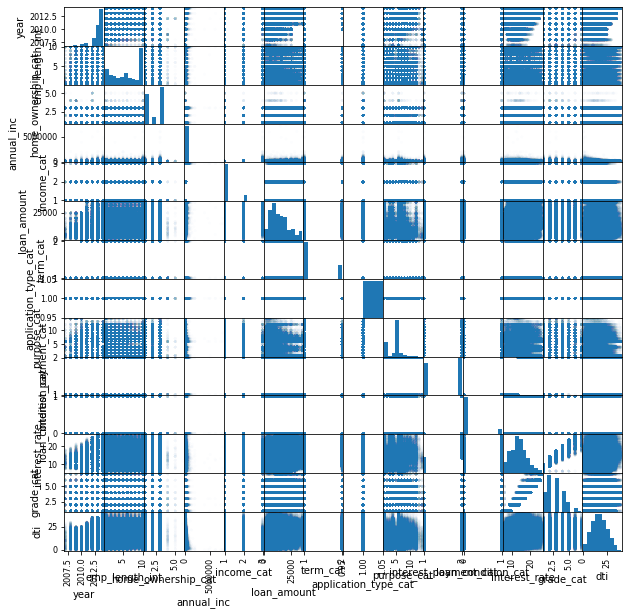

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[[
 'year',
 ##'issue_d',
 ##'final_d', - дата не через запятую
 'emp_length_int',
 ##'home_ownership',
 'home_ownership_cat',
 ##'income_category',
 'annual_inc',
 'income_cat',
 'loan_amount',
 ##'term',
 'term_cat',
 ##'application_type',
 'application_type_cat',
 ##'purpose',
 'purpose_cat',
 ##'interest_payments',
 'interest_payment_cat',
 ##'loan_condition',
 'loan_condition_cat',
 'interest_rate',
 ##'grade',
 'grade_cat',
 'dti',
 #'total_pymnt',
 #'total_rec_prncp',
 #'recoveries',
 #'installment',
 ##'region'
]], alpha = .01, figsize = (10,10))
pass

In [53]:
data.corr()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
id,1.000000,0.820601,-0.199171,0.012529,0.001403,0.033990,0.037234,0.063803,0.068539,0.034827,-0.020559,-0.120553,-0.190691,-0.142963,-0.007915,0.067781,-0.597261,-0.556328,-0.114386,0.025347
year,0.820601,1.000000,-0.184786,0.048980,0.019558,0.035911,0.037992,0.103722,0.081026,0.018610,-0.036398,-0.049023,-0.165122,-0.063632,0.016914,0.078530,-0.464010,-0.443454,-0.100694,0.075157
final_d,-0.199171,-0.184786,1.000000,-0.008798,-0.003452,-0.013948,-0.015349,-0.023783,-0.027823,-0.009521,0.016936,0.041204,0.178373,0.049275,0.023021,-0.017203,0.180982,0.199173,0.041700,-0.008882
emp_length_int,0.012529,0.048980,-0.008798,1.000000,0.204312,0.063382,0.039226,0.103898,0.067528,0.000525,0.019169,0.007701,-0.015821,0.008943,0.004301,0.020660,0.049354,0.036753,0.004163,0.088634
home_ownership_cat,0.001403,0.019558,-0.003452,0.204312,1.000000,0.154832,0.156441,0.196269,0.109770,0.009016,0.022575,-0.050201,-0.037253,-0.064271,-0.062029,0.001117,0.105861,0.095706,0.003483,0.163354
annual_inc,0.033990,0.035911,-0.013948,0.063382,0.154832,1.000000,0.630750,0.332697,0.058360,-0.006071,0.004787,-0.063125,-0.034142,-0.072785,-0.064426,-0.087409,0.160879,0.149993,0.007717,0.326181
income_cat,0.037234,0.037992,-0.015349,0.039226,0.156441,0.630750,1.000000,0.359688,0.042310,-0.005893,0.002355,-0.066881,-0.037397,-0.080198,-0.070596,-0.094228,0.172401,0.162372,0.005564,0.355886
loan_amount,0.063803,0.103722,-0.023783,0.103898,0.196269,0.332697,0.359688,1.000000,0.411717,0.013192,-0.037038,0.112867,0.003512,0.145023,0.150873,0.020675,0.474626,0.390473,0.073150,0.944977
term_cat,0.068539,0.081026,-0.027823,0.067528,0.109770,0.058360,0.042310,0.411717,1.000000,0.012165,0.029277,0.351261,0.039591,0.428058,0.442701,0.051077,0.083078,-0.025831,0.057290,0.144984
application_type_cat,0.034827,0.018610,-0.009521,0.000525,0.009016,-0.006071,-0.005893,0.013192,0.012165,1.000000,-0.000373,0.006674,-0.005997,0.010545,0.013671,0.074453,-0.021223,-0.019599,-0.002690,0.010953


In [64]:
data[[
 'year',
 'issue_d',
 ##'final_d', - дата не через запятую
 'emp_length_int',
 ##'home_ownership',
 'home_ownership_cat',
 ##'income_category',
 'annual_inc',
 #'income_cat',
 'loan_amount',
 ##'term',
 'term_cat',
 ##'application_type',
 #'application_type_cat',
 ##'purpose',
 'purpose_cat',
 ##'interest_payments',
 #'interest_payment_cat',
 ##'loan_condition',
 'loan_condition_cat',
 'interest_rate',
 ##'grade',
 'grade_cat',
 'dti',
 #'total_pymnt',
 #'total_rec_prncp',
 #'recoveries',
 'installment',
 ##'region'
]].corr()

,year,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,loan_condition_cat,interest_rate,grade_cat,dti,installment
year,1.000000,0.093528,0.045759,0.035876,0.131820,0.081712,-0.052286,-0.067281,0.080902,0.056699,0.161779,0.123538
emp_length_int,0.093528,1.000000,0.209403,0.073024,0.117871,0.079754,0.009641,-0.015908,0.029742,0.018822,0.048577,0.102606
home_ownership_cat,0.045759,0.209403,1.000000,0.183767,0.205170,0.119464,0.019706,-0.045416,-0.063726,-0.061184,0.001776,0.170733
annual_inc,0.035876,0.073024,0.183767,1.000000,0.370891,0.069948,0.013244,-0.047954,-0.046072,-0.037963,-0.188546,0.368143
loan_amount,0.131820,0.117871,0.205170,0.370891,1.000000,0.412870,-0.026441,0.017409,0.167183,0.163804,0.057319,0.949666
term_cat,0.081712,0.079754,0.119464,0.069948,0.412870,1.000000,0.038865,0.067491,0.443395,0.452361,0.091912,0.159631
purpose_cat,-0.052286,0.009641,0.019706,0.013244,-0.026441,0.038865,1.000000,0.030172,0.127081,0.131073,-0.022889,-0.027893
loan_condition_cat,-0.067281,-0.015908,-0.045416,-0.047954,0.017409,0.067491,0.030172,1.000000,0.179823,0.173262,0.052063,0.019649
interest_rate,0.080902,0.029742,-0.063726,-0.046072,0.167183,0.443395,0.127081,0.179823,1.000000,0.951984,0.159657,0.148790
grade_cat,0.056699,0.018822,-0.061184,-0.037963,0.163804,0.452361,0.131073,0.173262,0.951984,1.000000,0.146748,0.137508


Анализируя матрицу ковариации обратим внимание на признак loan_condition. Определим с какими признаками он имеет корелляционную зависимость. 
Видно, что loan_condition сильнее всего связан с параметрами:
interest_payment_cat,  interest_rate, grade_cat, installment
Удаляем interest_payment_cat, т.к это категории, сформированные на основе interest_rate.

interest_rate и grade_cat имеют очень сильную корелляционную связь. Лучше один исключить. В этой работе grade_cat оставлен

А так же loan_condition связан с :  final_d,  total_pymnt, total_rec_prncp, recoveries. 
Final_d отбасываем, т.к это интерпретация неверного формата даты. Final_d нужно будет привести к нужному формату или исключить. На самом деле его нужно исключить, т.к е эта информация неизвестна при обработке клиента
Признаки total_pymnt, total_rec_prncp, recoveries так же не известны при обработке клиента. Их тоже исключаем
Вывод:
loan_condition имеет значимые ковариационные связи с interest_rate, installment.
Признаки которые следует удалить из модели для обучения:
interest_payment_cat,  grade_cat
issue_d,  total_pymnt, total_rec_prncp, recoveries

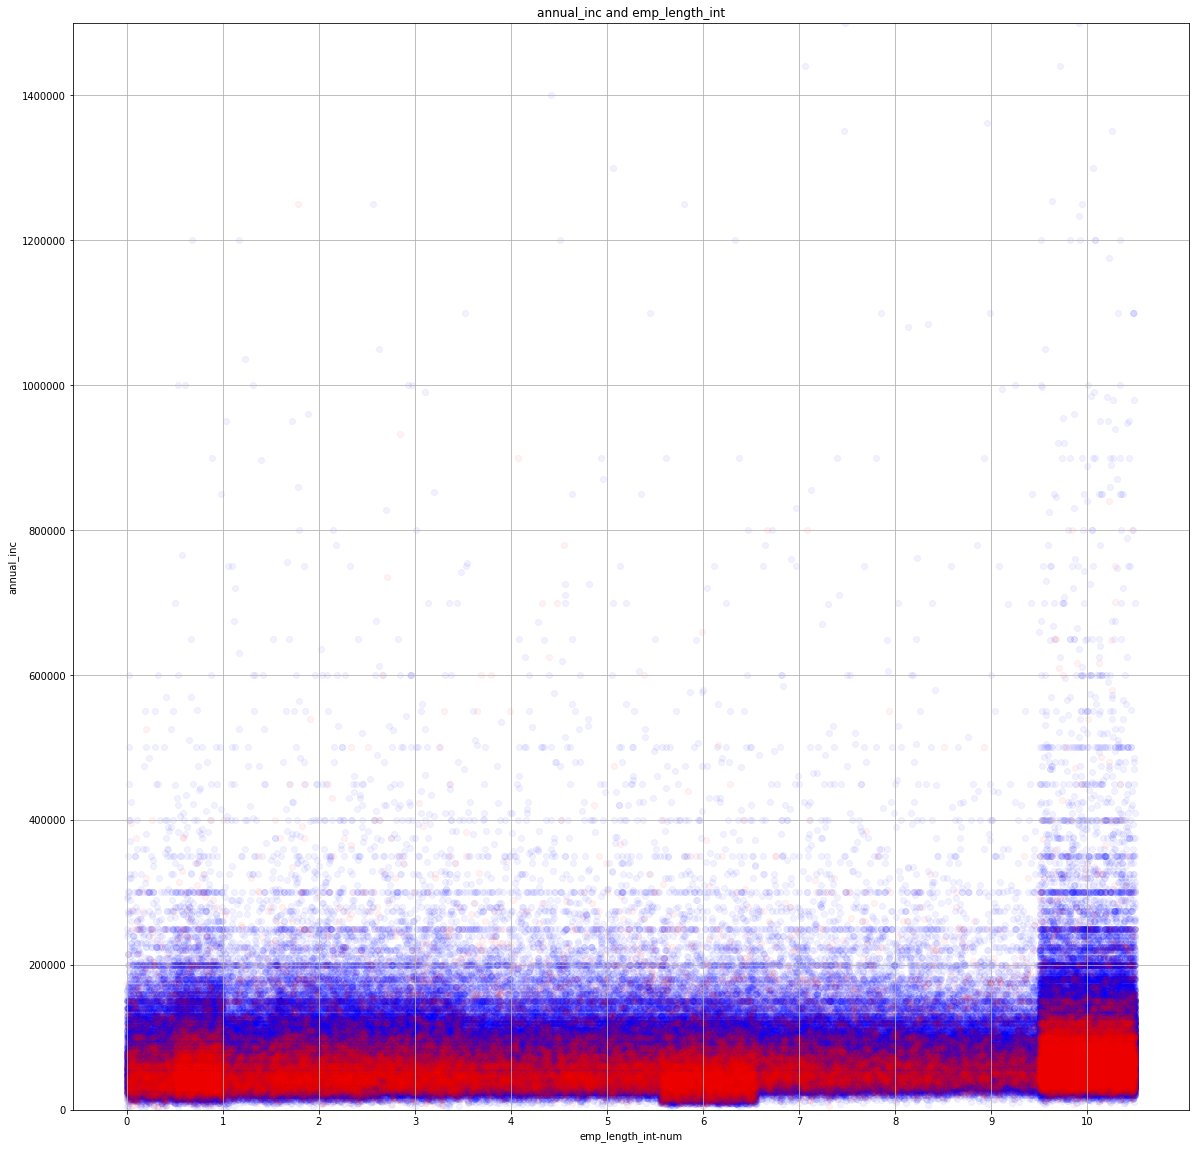

In [67]:
np.random.seed(0)
emp_length_int_rnd = data['emp_length_int'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (20, 20))

plt.scatter(emp_length_int_rnd[data['loan_condition'] == 'Good Loan'],
            data[data['loan_condition'] == 'Good Loan']['annual_inc'],
            alpha = 0.05,
            label = 'Good Loan',
            color = 'b')

plt.scatter(emp_length_int_rnd[data['loan_condition'] == 'Bad Loan'],
            data[data['loan_condition'] == 'Bad Loan']['annual_inc'],
            alpha = 0.05,
            label = 'Bad Loan',
            color = 'r')


plt.xlabel('emp_length_int-num')
plt.xticks(range(0,11))
plt.ylabel('annual_inc')
plt.ylim(0,1500000)
plt.title('annual_inc and emp_length_int')
plt.grid()

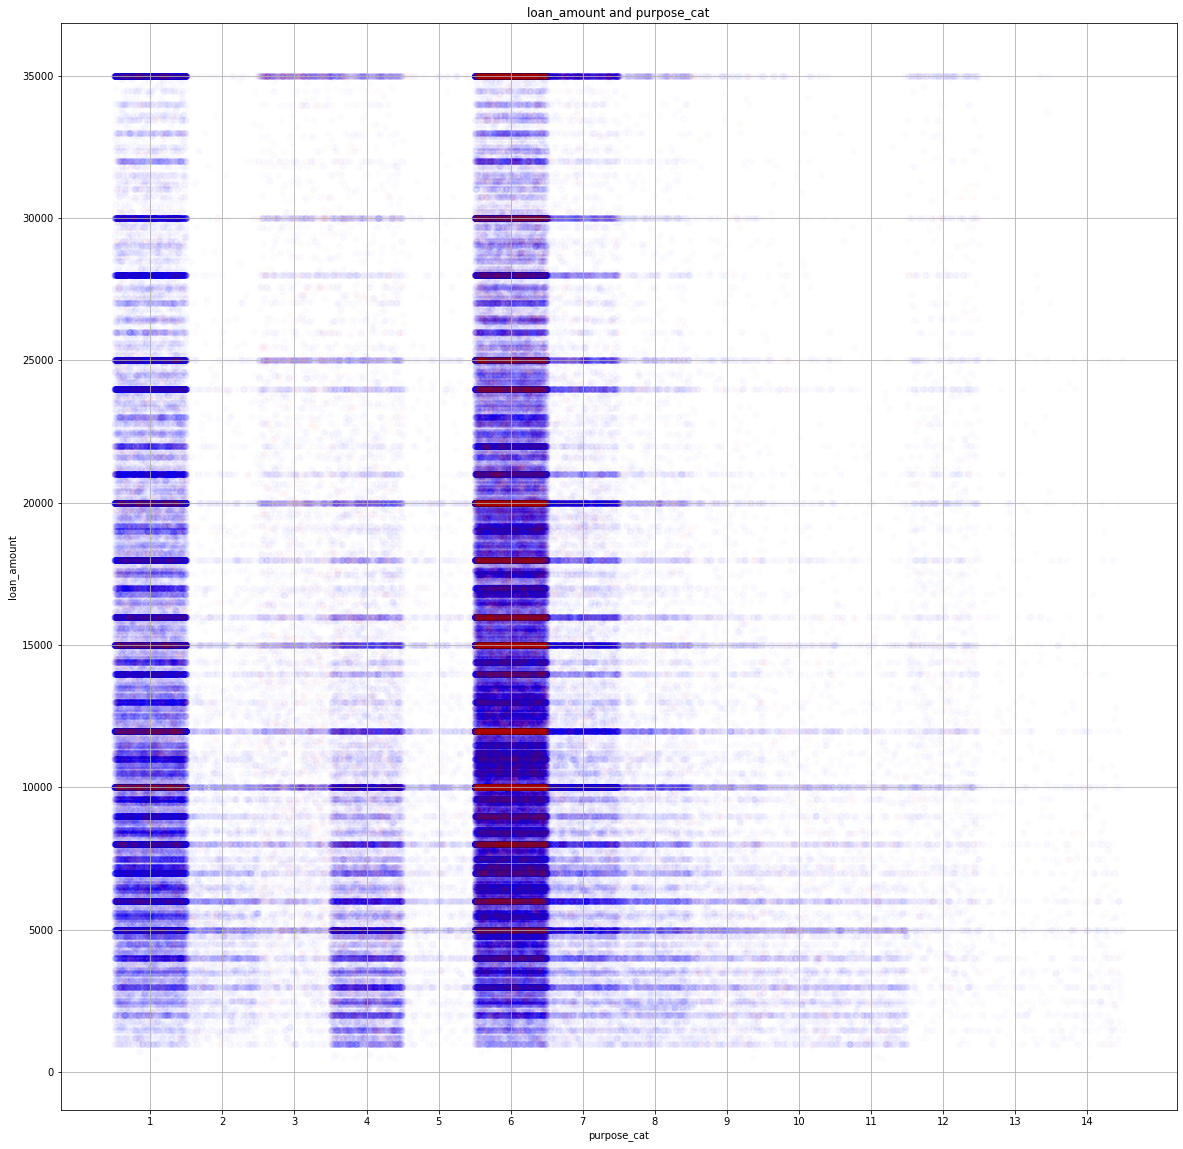

In [130]:
np.random.seed(0)
purpose_cat_rnd = data['purpose_cat'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (20, 20))

plt.scatter(purpose_cat_rnd[data['loan_condition'] == 'Good Loan'],
            data[data['loan_condition'] == 'Good Loan']['loan_amount'],
            alpha = 0.01,
            label = 'Good Loan',
            color = 'b')

plt.scatter(purpose_cat_rnd[data['loan_condition'] == 'Bad Loan'],
            data[data['loan_condition'] == 'Bad Loan']['loan_amount'],
            alpha = 0.01,
            label = 'Bad Loan',
            color = 'r')


plt.xlabel('purpose_cat')
plt.xticks( [1,2,3,4,5,6,7,8,9,10,11,12,13,14] )
plt.ylabel('loan_amount')
plt.title('loan_amount and purpose_cat')
plt.grid()

In [54]:
data.dtypes

id                        int64
year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [8]:
data.describe(include = ['object'])

,issue_d,home_ownership,income_category,term,application_type,purpose,interest_payments,loan_condition,grade,region
count,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379
unique,103,6,3,2,2,14,2,2,7,5
top,01/10/2015,MORTGAGE,Low,36 months,INDIVIDUAL,debt_consolidation,Low,Good Loan,B,leinster
freq,48631,443557,729616,621125,886868,524215,465316,819950,254535,214646


In [57]:
data.describe(include = 'all')

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
count,8.873790e+05,887379.000000,887379,8.873790e+05,887379.000000,887379,887379.000000,887379,8.873790e+05,887379.000000,...,887379.000000,887379.000000,887379,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379
unique,NaN,NaN,103,NaN,NaN,6,NaN,3,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,01/10/2015,NaN,NaN,MORTGAGE,NaN,Low,NaN,NaN,...,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,leinster
freq,NaN,NaN,48631,NaN,NaN,443557,NaN,729616,NaN,NaN,...,NaN,NaN,254535,NaN,NaN,NaN,NaN,NaN,NaN,214646
mean,3.246513e+07,2014.021761,NaN,1.047089e+06,6.050564,NaN,2.099130,NaN,7.502759e+04,1.196702,...,0.075987,13.246740,NaN,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127,NaN
std,2.282734e+07,1.261741,NaN,4.555149e+04,3.507405,NaN,0.944839,NaN,6.469815e+04,0.442542,...,0.264977,4.381867,NaN,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593,NaN
min,5.473400e+04,2007.000000,NaN,1.012008e+06,0.500000,NaN,1.000000,NaN,0.000000e+00,1.000000,...,0.000000,5.320000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000,NaN
25%,9.206643e+06,2013.000000,NaN,1.012016e+06,3.000000,NaN,1.000000,NaN,4.500000e+04,1.000000,...,0.000000,9.990000,NaN,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000,NaN
50%,3.443327e+07,2014.000000,NaN,1.012016e+06,6.050000,NaN,3.000000,NaN,6.500000e+04,1.000000,...,0.000000,12.990000,NaN,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000,NaN
75%,5.490814e+07,2015.000000,NaN,1.092015e+06,10.000000,NaN,3.000000,NaN,9.000000e+04,1.000000,...,0.000000,16.200000,NaN,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000,NaN


In [9]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [59]:
data['issue_d'].unique()

array(['01/12/2011', '01/11/2011', '01/10/2011', '01/09/2011',
       '01/08/2011', '01/07/2011', '01/06/2011', '01/05/2011',
       '01/04/2011', '01/03/2011', '01/02/2011', '01/01/2011',
       '01/12/2010', '01/11/2010', '01/10/2010', '01/09/2010',
       '01/08/2010', '01/07/2010', '01/06/2010', '01/05/2010',
       '01/04/2010', '01/03/2010', '01/02/2010', '01/01/2010',
       '01/12/2009', '01/11/2009', '01/10/2009', '01/09/2009',
       '01/08/2009', '01/07/2009', '01/06/2009', '01/05/2009',
       '01/04/2009', '01/03/2009', '01/02/2009', '01/01/2009',
       '01/12/2008', '01/11/2008', '01/10/2008', '01/09/2008',
       '01/08/2008', '01/07/2008', '01/06/2008', '01/05/2008',
       '01/04/2008', '01/03/2008', '01/02/2008', '01/01/2008',
       '01/12/2007', '01/11/2007', '01/10/2007', '01/09/2007',
       '01/08/2007', '01/07/2007', '01/06/2007', '01/12/2013',
       '01/11/2013', '01/10/2013', '01/09/2013', '01/08/2013',
       '01/07/2013', '01/06/2013', '01/05/2013', '01/04

In [60]:
for name in data['purpose'].unique():
    print(name, data['purpose_cat'][data['purpose'] == name].iloc[0])

credit_card 1
car 2
small_business 3
other 4
wedding 5
debt_consolidation 6
home_improvement 7
major_purchase 8
medical 9
moving 10
vacation 11
house 12
renewable_energy 13
educational 14


In [61]:
for name in data['home_ownership'].unique():
    print(name, data['home_ownership_cat'][data['home_ownership'] == name].iloc[0])

RENT 1
OWN 2
MORTGAGE 3
OTHER 4
NONE 5
ANY 6


In [62]:
data['region'].unique()

array(['munster', 'leinster', 'cannught', 'ulster', 'Northern-Irl'],
      dtype=object)

## Задача

Задача - определить статус заемщика по информции, которая доступна при оформлении кредита. Доступно два статуса - хороший (тот кто вероятнее всего выплятит кредит без проблем) или плохой заемщик (тот, у которого вероятнее будут проблемы с выплатой кредита)

Удаляем признаки:
`interest_payment_cat`
`issue_d`,  `total_pymnt`, `total_rec_prncp`, `recoveries`.

Так же удаляем категориальные признаки, для которых у нас присутсвтует дублирующий признак с цифровым классом:
`home_ownership`, `term`, `grade`

Удаляем отнесеные к категориям цифровые признаки:
`income_category`, `income_cat`, `interest_payments`, `interest_payments_сat`

Удаляем `application_type_cat`, т.к этот прзинак для всех записей одинаковый

In [ ]:
#data = data.drop('capital-gain', axis = 1)\
   #         .drop('capital-loss', axis = 1)\
  #         .drop('education',    axis = 1)\
 #          .drop('native-country', axis = 1).drop('fnlwgt', axis = 1)
#data.drop()

In [10]:
#так тоже работает
data.drop([
  'id', # не несет полезной информации 
 #'year',
 #'issue_d',
 'final_d', # эта информация известна уже после того, как заемщик отдал кредит
 #'emp_length_int',
 'home_ownership', # оставляем категорию home_ownership_cat
 #'home_ownership_cat',
 'income_category', # оставляем поле annual_inc
 #'annual_inc',
 'income_cat',  # оставляем поле annual_inc 
 #'loan_amount',
 'term',# - оставляем  категорию term_cat
 #'term_cat',
 'application_type', # все с одинаковым значением
 'application_type_cat', # все с одинаковым значением
 'purpose', # оставляем категорию purpose_cat
 #'purpose_cat',
 'interest_payments', # оставляем категорию interest_rate
 'interest_payment_cat', # оставляем категорию interest_rate
 #'loan_condition', 
 'loan_condition_cat',# оставляем категорию loan_condition
 'interest_rate',
 'grade', # оставляем категорию grade_cat
 #'grade_cat',
 #'dti',
 'total_pymnt', # информация известна уже после того, как заемщик отдал кредит 
 'total_rec_prncp', # информация известна уже после того, как заемщик отдал кредит 
 'recoveries', # информация известна уже после того, как заемщик отдал кредит 
 'installment', # информация известна уже после того, как заемщик отдал кредит 
 #'region'
], axis = 1)


,year,issue_d,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,loan_condition,grade_cat,dti,region
0,2011,01/12/2011,10.00,1,24000,5000,1,1,Good Loan,2,27.65,munster
1,2011,01/12/2011,0.50,1,30000,2500,2,2,Bad Loan,3,1.00,leinster
2,2011,01/12/2011,10.00,1,12252,2400,1,3,Good Loan,3,8.72,cannught
3,2011,01/12/2011,10.00,1,49200,10000,1,4,Good Loan,3,20.00,ulster
4,2011,01/12/2011,1.00,1,80000,3000,2,4,Good Loan,2,17.94,ulster
5,2011,01/12/2011,3.00,1,36000,5000,1,5,Good Loan,1,11.20,munster
6,2011,01/12/2011,8.00,1,47004,7000,2,6,Good Loan,3,23.51,leinster
7,2011,01/12/2011,9.00,1,48000,3000,1,2,Good Loan,5,5.35,ulster
8,2011,01/12/2011,4.00,2,40000,5600,2,3,Bad Loan,6,5.55,ulster
9,2011,01/12/2011,0.50,1,15000,5375,2,4,Bad Loan,2,18.08,munster


In [11]:
data = data.drop([
  'id',# Не несет смысловой нагрузки
 #'year',
 #'issue_d',
 'final_d', # эта информация известна уже после того, как заемщик отдал кредит
 #'emp_length_int',
 'home_ownership', # оставляем категорию home_ownership_cat
 #'home_ownership_cat',
 'income_category', # оставляем поле annual_inc
 #'annual_inc',
 'income_cat',  # оставляем поле annual_inc 
 #'loan_amount',
 'term',# - оставляем  категорию term_cat
 #'term_cat',
 'application_type', # все с одинаковым значением
 'application_type_cat', # все с одинаковым значением
 'purpose', # оставляем категорию purpose_cat
 #'purpose_cat',
 'interest_payments', # оставляем категорию interest_rate
 'interest_payment_cat', # оставляем категорию interest_rate
 #'loan_condition', 
 'loan_condition_cat',# оставляем категорию loan_condition
 'interest_rate',
 'grade', # оставляем категорию grade_cat
 #'grade_cat',
 #'dti',
 'total_pymnt', # информация известна уже после того, как заемщик отдал кредит 
 'total_rec_prncp', # информация известна уже после того, как заемщик отдал кредит 
 'recoveries', # информация известна уже после того, как заемщик отдал кредит 
 'installment', # информация известна уже после того, как заемщик отдал кредит 
 #'region'
], axis = 1)

In [12]:
data_reserv = data.copy()

In [13]:
data.head()

,year,issue_d,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,loan_condition,grade_cat,dti,region
0,2011,01/12/2011,10.0,1,24000,5000,1,1,Good Loan,2,27.65,munster
1,2011,01/12/2011,0.5,1,30000,2500,2,2,Bad Loan,3,1.00,leinster
2,2011,01/12/2011,10.0,1,12252,2400,1,3,Good Loan,3,8.72,cannught
3,2011,01/12/2011,10.0,1,49200,10000,1,4,Good Loan,3,20.00,ulster
4,2011,01/12/2011,1.0,1,80000,3000,2,4,Good Loan,2,17.94,ulster


# Готовим данные

In [14]:
data['issue_d'].unique()

array(['01/12/2011', '01/11/2011', '01/10/2011', '01/09/2011',
       '01/08/2011', '01/07/2011', '01/06/2011', '01/05/2011',
       '01/04/2011', '01/03/2011', '01/02/2011', '01/01/2011',
       '01/12/2010', '01/11/2010', '01/10/2010', '01/09/2010',
       '01/08/2010', '01/07/2010', '01/06/2010', '01/05/2010',
       '01/04/2010', '01/03/2010', '01/02/2010', '01/01/2010',
       '01/12/2009', '01/11/2009', '01/10/2009', '01/09/2009',
       '01/08/2009', '01/07/2009', '01/06/2009', '01/05/2009',
       '01/04/2009', '01/03/2009', '01/02/2009', '01/01/2009',
       '01/12/2008', '01/11/2008', '01/10/2008', '01/09/2008',
       '01/08/2008', '01/07/2008', '01/06/2008', '01/05/2008',
       '01/04/2008', '01/03/2008', '01/02/2008', '01/01/2008',
       '01/12/2007', '01/11/2007', '01/10/2007', '01/09/2007',
       '01/08/2007', '01/07/2007', '01/06/2007', '01/12/2013',
       '01/11/2013', '01/10/2013', '01/09/2013', '01/08/2013',
       '01/07/2013', '01/06/2013', '01/05/2013', '01/04

In [15]:
pd.to_datetime('01/04/2015').day # day is month

4

In [16]:
data['issue_month'] = pd.DatetimeIndex(data['issue_d']).day

In [17]:
data = data.drop(['issue_d'], axis = 1)

In [18]:
data['issue_month'].dtype.name

'int64'

In [19]:
data['region'].dtype.name

'object'

In [20]:
data['annual_inc'].dtype.name

'int64'

In [ ]:
#categorical_columns = []
#numerical_columns = []
#for c in data.columns:
#    if data[c].dtype.name == 'object':
#        categorical_columns.append(c)
#    else:
#        numerical_columns.append(c)          

In [21]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object' and data[c].dtype.name != 'datetime64[ns]']
# date_columns        = [c for c in data.columns if data[c].dtype.name == 'datetime64[ns]']
print(categorical_columns)
print(numerical_columns)
# print(date_columns)

['loan_condition', 'region']
['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'loan_amount', 'term_cat', 'purpose_cat', 'grade_cat', 'dti', 'issue_month']


In [22]:
for c in categorical_columns:
    print(c, data[c].unique())

loan_condition ['Good Loan' 'Bad Loan']
region ['munster' 'leinster' 'cannught' 'ulster' 'Northern-Irl']


## Обрабатываем пропущенные значения

В рассматриваемой задаче нет пропущеных значений

In [23]:
data[numerical_columns].count(axis = 0)

year                  887379
emp_length_int        887379
home_ownership_cat    887379
annual_inc            887379
loan_amount           887379
term_cat              887379
purpose_cat           887379
grade_cat             887379
dti                   887379
issue_month           887379
dtype: int64

In [24]:
data[categorical_columns].count(axis = 0)

loan_condition    887379
region            887379
dtype: int64

In [25]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [26]:
data.describe()

,year,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,grade_cat,dti,issue_month
count,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,2014.021761,6.050564,2.099130,7.502759e+04,14755.264605,1.300045,4.874621,2.798403,18.157039,7.023412
std,1.261741,3.507405,0.944839,6.469815e+04,8435.455601,0.458278,2.381156,1.312599,17.190626,3.385852
min,2007.000000,0.500000,1.000000,0.000000e+00,500.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2013.000000,3.000000,1.000000,4.500000e+04,8000.000000,1.000000,3.000000,2.000000,11.910000,4.000000
50%,2014.000000,6.050000,3.000000,6.500000e+04,13000.000000,1.000000,6.000000,3.000000,17.650000,7.000000
75%,2015.000000,10.000000,3.000000,9.000000e+04,20000.000000,2.000000,6.000000,4.000000,23.950000,10.000000
max,2015.000000,10.000000,6.000000,9.500000e+06,35000.000000,2.000000,14.000000,7.000000,9999.000000,12.000000


## Векторизация

Обрабатываем категориальные признаки

In [27]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['loan_condition'] ['region']


К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 5 различных значений: 

In [28]:
nonbinary_columns

['region']

In [29]:
data['region'].unique()

array(['munster', 'leinster', 'cannught', 'ulster', 'Northern-Irl'],
      dtype=object)

Заменим признак `region` 5 признаками: `region_munster`, `region_leinster`, ..., `region_Northern-Irl`.

 - Если признак `region` принимает значение `munster`, то признак `region_munster` равен `1`, а все остальные равны `0`.
 - Если признак `race` принимает значение `leinster`, то признак `region_leinster` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [30]:
data[nonbinary_columns].head()

,region
0,munster
1,leinster
2,cannught
3,ulster
4,ulster


In [31]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['region_Northern-Irl', 'region_cannught', 'region_leinster',
       'region_munster', 'region_ulster'],
      dtype='object')


In [32]:
data_nonbinary.head()

,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [33]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,year,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,grade_cat,dti,issue_month
count,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,2014.021761,6.050564,2.099130,7.502759e+04,14755.264605,1.300045,4.874621,2.798403,18.157039,7.023412
std,1.261741,3.507405,0.944839,6.469815e+04,8435.455601,0.458278,2.381156,1.312599,17.190626,3.385852
min,2007.000000,0.500000,1.000000,0.000000e+00,500.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2013.000000,3.000000,1.000000,4.500000e+04,8000.000000,1.000000,3.000000,2.000000,11.910000,4.000000
50%,2014.000000,6.050000,3.000000,6.500000e+04,13000.000000,1.000000,6.000000,3.000000,17.650000,7.000000
75%,2015.000000,10.000000,3.000000,9.000000e+04,20000.000000,2.000000,6.000000,4.000000,23.950000,10.000000
max,2015.000000,10.000000,6.000000,9.500000e+06,35000.000000,2.000000,14.000000,7.000000,9999.000000,12.000000


In [34]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [35]:
data_numerical.describe()

,year,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,grade_cat,dti,issue_month
count,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05
mean,-1.024626e-12,1.567133e-12,5.126582e-14,-3.025390e-14,8.401165e-14,6.774540e-13,1.126206e-13,-2.078173e-14,9.676738e-15,-5.212822e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.565135e+00,-1.582527e+00,-1.163299e+00,-1.159656e+00,-1.689922e+00,-6.547241e-01,-1.627202e+00,-1.370108e+00,-1.056217e+00,-1.778994e+00
25%,-8.098021e-01,-8.697498e-01,-1.163299e+00,-4.641182e-01,-8.008180e-01,-6.547241e-01,-7.872734e-01,-6.082610e-01,-3.633980e-01,-8.929545e-01
50%,-1.724657e-02,-1.609049e-04,9.534644e-01,-1.549903e-01,-2.080818e-01,-6.547241e-01,4.726189e-01,1.535861e-01,-2.949507e-02,-6.914550e-03
75%,7.753089e-01,1.126028e+00,9.534644e-01,2.314195e-01,6.217489e-01,1.527359e+00,4.726189e-01,9.154332e-01,3.369837e-01,8.791254e-01
max,7.753089e-01,1.126028e+00,4.128610e+00,1.456761e+02,2.399958e+00,1.527359e+00,3.832332e+00,3.200975e+00,5.805980e+02,1.469819e+00


## Соединяем все в одну таблицу

In [36]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(887379, 16)


In [37]:
data_reserv_2 = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)

#print data.columns

In [38]:
data.head()

,year,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,grade_cat,dti,issue_month,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster,loan_condition
0,-2.394913,1.126028,-1.163299,-0.788702,-1.156460,-0.654724,-1.627202,-0.608261,0.552217,1.469819,0,0,0,1,0,Good Loan
1,-2.394913,-1.582527,-1.163299,-0.695964,-1.452828,1.527359,-1.207237,0.153586,-0.998046,1.469819,0,0,1,0,0,Bad Loan
2,-2.394913,1.126028,-1.163299,-0.970284,-1.464683,-0.654724,-0.787273,0.153586,-0.548964,1.469819,0,1,0,0,0,Good Loan
3,-2.394913,1.126028,-1.163299,-0.399201,-0.563724,-0.654724,-0.367309,0.153586,0.107207,1.469819,0,0,0,0,1,Good Loan
4,-2.394913,-1.439972,-1.163299,0.076856,-1.393554,1.527359,-0.367309,-0.608261,-0.012625,1.469819,0,0,0,0,1,Good Loan


In [39]:
data.describe()

,year,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,grade_cat,dti,issue_month,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
count,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,-1.024626e-12,1.567133e-12,5.126582e-14,-3.025390e-14,8.401165e-14,6.774540e-13,1.126206e-13,-2.078173e-14,9.676738e-15,-5.212822e-13,0.230340,0.174704,0.241888,0.117846,0.235222
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.421051,0.379714,0.428227,0.322426,0.424138
min,-5.565135e+00,-1.582527e+00,-1.163299e+00,-1.159656e+00,-1.689922e+00,-6.547241e-01,-1.627202e+00,-1.370108e+00,-1.056217e+00,-1.778994e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.098021e-01,-8.697498e-01,-1.163299e+00,-4.641182e-01,-8.008180e-01,-6.547241e-01,-7.872734e-01,-6.082610e-01,-3.633980e-01,-8.929545e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.724657e-02,-1.609049e-04,9.534644e-01,-1.549903e-01,-2.080818e-01,-6.547241e-01,4.726189e-01,1.535861e-01,-2.949507e-02,-6.914550e-03,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.753089e-01,1.126028e+00,9.534644e-01,2.314195e-01,6.217489e-01,1.527359e+00,4.726189e-01,9.154332e-01,3.369837e-01,8.791254e-01,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.753089e-01,1.126028e+00,4.128610e+00,1.456761e+02,2.399958e+00,1.527359e+00,3.832332e+00,3.200975e+00,5.805980e+02,1.469819e+00,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [87]:
X = data.drop('loan_condition', axis = 1) # выбрасываем столбец 'loan_condition'
y = data['loan_condition']
feature_names = X.columns

In [88]:
type(feature_names)

pandas.core.indexes.base.Index

In [89]:
feature_names

Index(['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc',
       'loan_amount', 'term_cat', 'purpose_cat', 'grade_cat', 'dti',
       'issue_month', 'region_Northern-Irl', 'region_cannught',
       'region_leinster', 'region_munster', 'region_ulster'],
      dtype='object')

In [90]:
X = X.to_numpy()

In [91]:
y = np.array(y != 'Bad Loan', dtype='int')

In [92]:
y

array([1, 0, 1, ..., 1, 1, 1])

In [93]:
print(X.shape)
print(y.shape)
N, d = X.shape

(887379, 15)
(887379,)


In [94]:
type(X)

numpy.ndarray

In [95]:
type(y)

numpy.ndarray

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

621165 266214


In [99]:
X_test.shape

(266214, 15)

# $k$NN

In [276]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [52]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

9:08

In [53]:
%time
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

Wall time: 0 ns


In [277]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [258]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [259]:
err_test

0.07974411563629258

In [291]:
err_train

0.0749832975135431

In [260]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[   486  19810]
 [  1419 244499]]


In [261]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подбор параметров

In [131]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

KeyboardInterrupt: 

наилучший результат достигается при количестве соседей 55 

In [154]:
best_n_neighbors = 55

In [155]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.07586873053053536 0.07622814728000782


Видно, что подбором параметров алгоритма близжайших соседей (самое оптимально из рассмотреных значений - 50) была улучшена точность работы алгоритма. 
С 12,6% до 11.9%.
В целом получены удовлетворительные результаты. 
Однако заметно, что алгоритм совершнает в несколько раз большую ошибку с отнесением к классу Bad loan. Что можно объяснить несбалансированностью классов. 
Так же в этой работе была отброшена графа `issue_d`. Возможно наличие этой информации так же увеличит точноить алгоритма.


<h1 align="center"> Метод главных компонент (PCA) </h1>

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [193]:
type(X)

numpy.ndarray

## PCA с двумя главными компонентами

In [156]:
X.shape

(887379, 15)

Изначально имеем набор данных с 15 признаками.
Большое количество признаков негативно вляет работу некоторых алгоритов(например метода близжайших соседей), а так же на скорость работы алгоритмов машинного обучения. 
Так же, такой набор данных непросто визуализировать. 
Выполним уменьшение размерности с помощью метода главных компонент.
Начнем с приведению к двум главным компонентам для наглядной визуализации данных.

In [157]:
pca = PCA(n_components=2)

In [158]:
principalComponents = pca.fit_transform(X)

In [159]:
principalComponents.shape

(887379, 2)

In [160]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [161]:
principalDf.head()

,principal component 1,principal component 2
0,-2.007836,-0.024640
1,-1.322394,1.513214
2,-1.975349,0.474371
3,-1.255242,0.336194
4,-1.210059,1.112082


In [162]:
data['loan_condition'].head()

0    Good Loan
1     Bad Loan
2    Good Loan
3    Good Loan
4    Good Loan
Name: loan_condition, dtype: object

In [163]:
finalDf = pd.concat([principalDf, data[['loan_condition']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,loan_condition
0,-2.007836,-0.024640,Good Loan
1,-1.322394,1.513214,Bad Loan
2,-1.975349,0.474371,Good Loan
3,-1.255242,0.336194,Good Loan
4,-1.210059,1.112082,Good Loan


## Визуализация проекции на две главные компоненты

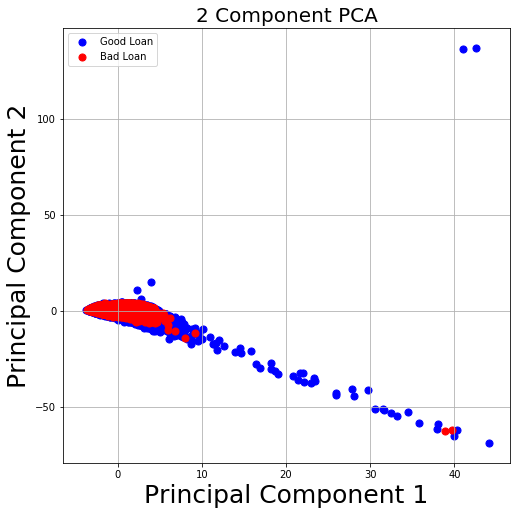

In [220]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 25)
ax.set_ylabel('Principal Component 2', fontsize = 25)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Good Loan', 'Bad Loan']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['loan_condition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Видно, что на представленном графике данные хорошо разделимы. Отчетливо видна граница двух классов. 

In [207]:
pca.explained_variance_ratio_.s

array([0.17190659, 0.12776961])

Однако доля объясненой дисперии составляет всего 29,9%. 

In [208]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = ['principal_component_1', 'principal_component_2']
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('Суммарная доля информации: {}%'.format(sum(explained_variance_ratio) * 100))

principal_component_1: 17.190658921570815%
principal_component_2: 12.776961154480752%
Суммарная доля информации: 29.967620076051567%


## KNN on Visualized 2D Projection

Выполним предсказание модели с помощью алгоритма KNN на данных,приведенных к 2м признакам методом главных компонент

In [225]:
X_2d = finalDf.drop('loan_condition', axis = 1) # выбрасываем столбец 'loan_condition'
y_2d = finalDf['loan_condition']
feature_names_2d = X_2d.columns

In [229]:
X_2d = X_2d.to_numpy()

In [230]:
y_2d = np.array(y_2d != 'Bad Loan', dtype='int')

In [231]:
y_2d

array([1, 0, 1, ..., 1, 1, 1])

In [233]:
print(X_2d.shape)
print(y_2d.shape)
N, d = X_2d.shape

(887379, 2)
(887379,)


In [234]:
type(X)

numpy.ndarray

In [235]:
type(y)

numpy.ndarray

In [236]:
from sklearn.model_selection import train_test_split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size = 0.3, random_state = 42)

N_train_2d, _ = X_train_2d.shape 
N_test_2d,  _ = X_test_2d.shape 

print(N_train_2d, N_test_2d)

621165 266214


In [238]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train_2d, y_train_2d)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [242]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [244]:
y_test_2d_predict = knn.predict(X_test_2d)
err_test  = np.mean(y_test_2d  != y_test_2d_predict)

In [247]:
err_test

0.07736632934406154

In [249]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_2d, y_test_2d_predict))

[[    85  20211]
 [   385 245533]]


In [250]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

При запуске алгоритма KNN (10 соседей) на данных с начальными необработанными признаками была получена ошибка 0.07974411563629258 на тестовой выборке <br /> 
При запуске этого же алгоритма на данных, приведенных к двум признакам получена ошибка 0.07736632934406154 на тестовой выборке .  <br /> 
Таким образом, приведение к двум главным компонентам не только ускорила работу алгоритма, но и улучшило скорость его работы, даже несмотря на то, что величина объясненой дисперсии на двух компонентах составляет всего 29,9%. <br /> 
Это явление можно объяснить тем, что в данных присутствуют признаки, оказывающие малое влияние на искомый ответ.

### Изменение количества главных компонент

Наилучшие результаты предсказания были получены с помощью алгоритма KNN для 55 близжайших соседей. 
Сравним качество работы алгоритма при изменении числа главных компонент. 

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
accuracy_test = []
accuracy_train = []
num_comp = []
explained_variance = []
for num_components in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    pca = PCA(n_components=num_components)
    principalComponents = pca.fit_transform(X)
    columns_n = []
    for number in range(1,num_components + 1):
        columns_n.append('principal component ' + str(number))
    principalDf = pd.DataFrame(data = principalComponents
            , columns = columns_n)
    finalDf = pd.concat([principalDf, data[['loan_condition']]], axis = 1)
#     print(finalDf.head(5))
    X_pca = finalDf.drop('loan_condition', axis = 1) # выбрасываем столбец 'loan_condition'
    y_pca = finalDf['loan_condition']
    feature_names = X_pca.columns
    X_pca = X_pca.to_numpy()
    y_pca = np.array(y_pca != 'Bad Loan', dtype='int')
    print(X_pca.shape)
    print(y_pca.shape)
    N, d = X_pca.shape
    X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size = 0.3, random_state = 42)

    N_pca_train, _ = X_pca_train.shape 
    N_pca_test,  _ = X_pca_test.shape 
    print(N_pca_train, N_pca_test)
    knn = KNeighborsClassifier(n_neighbors = 55)
    knn.fit(X_pca_train, y_pca_train)
    
    
    y_pca_test_predict = knn.predict(X_pca_test)
    err_test  = np.mean(y_pca_test  != y_pca_test_predict)
    err_train = np.mean(y_pca_train != knn.predict(X_pca_train))
    
    
    
    
#     y_pca_test_predict = knn.predict(X_pca_test)
#     y_pca_train_predict = knn.predict(X_pca_train)
#     err_test  = np.mean(y_pca_test  != y_pca_test_predict)
#     err_train  = np.mean(err_train  != y_pca_train_predict)
    
    print('number of components:',num_components, ',','error_test',err_test,'error_train',err_train)
    print('explained_variance_ratio_:',pca.explained_variance_ratio_.sum())
    accuracy_test.append(err_test)
    accuracy_train.append(err_train)
    num_comp.append(num_components)
    explained_variance.append(pca.explained_variance_ratio_.sum())

(887379, 1)
(887379,)
621165 266214
number of components: 1 , error_test 0.07623941640935487 error_train 0.07587838979981164
explained_variance_ratio_: 0.17190658922835325
(887379, 2)
(887379,)
621165 266214
number of components: 2 , error_test 0.07623941640935487 error_train 0.07587838979981164
explained_variance_ratio_: 0.29967620129282124
(887379, 3)
(887379,)
621165 266214
number of components: 3 , error_test 0.0762431727858039 error_train 0.07587677992159893
explained_variance_ratio_: 0.40174097424849453
(887379, 4)
(887379,)
621165 266214
number of components: 4 , error_test 0.0762431727858039 error_train 0.0758735601651735
explained_variance_ratio_: 0.5006356490893975
(887379, 5)
(887379,)
621165 266214
number of components: 5 , error_test 0.07623941640935487 error_train 0.07587999967802436
explained_variance_ratio_: 0.5945938386294944
(887379, 6)
(887379,)
621165 266214
number of components: 6 , error_test 0.07625444191515098 error_train 0.07587677992159893
explained_variance_r

KeyboardInterrupt: 

In [244]:
error_test = list(np.ones(10)*0.07586873053053536)

In [245]:
error_train = list(np.ones(10)*0.07622814728000782)

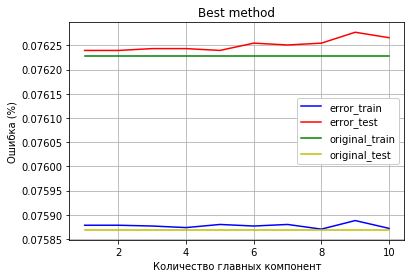

In [290]:
plt.xlabel("Количество главных компонент")
plt.ylabel("Ошибка (%)")
plt.ylim()
plt.title("Best method")
plt.plot(num_comp, accuracy_train, 'b', label = 'error_train')
plt.plot(num_comp, accuracy_test,'r', label = 'error_test')
plt.plot(num_comp, error_train, 'g', label = 'original_train')
plt.plot(num_comp, error_test, 'y', label = 'original_test')
plt.grid(True)
plt.legend(loc = 'best', framealpha = 2)


При запуске алгоритма KNN (55 соседей) на данных с начальными необработанными признаками была получена ошибка 0.07586873053053536  на обучающей выборке и на тестовой 0.07622814728000782. <br />
Изменение ошибки при изменении количества главных компонент крайне несущественно. Важно отметить момент, что при практически одинаковых результатах предсказания скорость вычисления при маленьких количествах главных компонент намного превосходит скорость вычисления при их большом количестве. <br />
Так как KNN на 55 вершинах не сильно восприимчив к небоьлшим изменениям соседей, и так как на прошлом тесте для 10 соседей была заметная разница в работе алгоритма при запуске его на 2х шлавных копмонетнах, протестирую KNN на 10 вершинах

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

In [186]:
accuracy_2_test = []
accuracy_2_train = []
num_comp_2 = []
explained_variance_2 = []
for num_components in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    pca = PCA(n_components=num_components)
    principalComponents = pca.fit_transform(X)
    columns_n = []
    for number in range(1,num_components + 1):
        columns_n.append('principal component ' + str(number))
    principalDf = pd.DataFrame(data = principalComponents
            , columns = columns_n)
    finalDf = pd.concat([principalDf, data[['loan_condition']]], axis = 1)
#     print(finalDf.head(5))
    X_pca = finalDf.drop('loan_condition', axis = 1) # выбрасываем столбец 'loan_condition'
    y_pca = finalDf['loan_condition']
    feature_names = X_pca.columns
    X_pca = X_pca.to_numpy()
    y_pca = np.array(y_pca != 'Bad Loan', dtype='int')
#     print(X_pca.shape)
#     print(y_pca.shape)
    N, d = X_pca.shape
    X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size = 0.3, random_state = 42)

    N_pca_train, _ = X_pca_train.shape 
    N_pca_test,  _ = X_pca_test.shape 
#     print(N_pca_train, N_pca_test)
    knn = KNeighborsClassifier(n_neighbors = 10)
    knn.fit(X_pca_train, y_pca_train)
    y_pca_test_predict = knn.predict(X_pca_test)

    err_test  = np.mean(y_pca_test  != y_pca_test_predict)
    err_train = np.mean(y_pca_train != knn.predict(X_pca_train))

    print('number of components:',num_components, ',','error_test',err_test,'error_train',err_train)
    print('explained_variance_ratio_:',pca.explained_variance_ratio_.sum())
    accuracy_2_test.append(err_test)
    accuracy_2_train.append(err_train)
    num_comp_2.append(num_components)
    explained_variance_2.append(pca.explained_variance_ratio_.sum())

number of components: 1 , error_test 0.07662256680715515 error_train 0.07587838979981164
explained_variance_ratio_: 0.17190658922835203
number of components: 2 , error_test 0.07735130383826545 error_train 0.07584136260091924
explained_variance_ratio_: 0.2996762011293993
number of components: 3 , error_test 0.07862471545448399 error_train 0.07570774270926404
explained_variance_ratio_: 0.4017409738672773
number of components: 4 , error_test 0.07919568467473537 error_train 0.07575442917743273
explained_variance_ratio_: 0.500635649089397
number of components: 5 , error_test 0.07910553163995883 error_train 0.07559183147794869
explained_variance_ratio_: 0.5945938386294931
number of components: 6 , error_test 0.07995447271743784 error_train 0.07520868046332295
explained_variance_ratio_: 0.6798131111646609
number of components: 7 , error_test 0.08034137949168714 error_train 0.07508310996273132
explained_variance_ratio_: 0.7610611074968563
number of components: 8 , error_test 0.0803601613739322

In [292]:
error_test_2 = list(np.ones(14)*0.07974411563629258)

In [293]:
error_train_2 = list(np.ones(14)*0.0749832975135431)

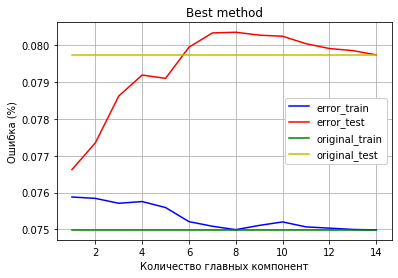

In [295]:
plt.xlabel("Количество главных компонент")
plt.ylabel("Ошибка (%)")
plt.ylim()
plt.title("Best method")
plt.plot(num_comp_2, accuracy_2_train, 'b', label = 'error_train')
plt.plot(num_comp_2, accuracy_2_test,'r', label = 'error_test')
plt.plot(num_comp_2, error_train_2, 'g', label = 'original_train')
plt.plot(num_comp_2, error_test_2, 'y', label = 'original_test')
plt.grid(True)


plt.legend(loc = 'best', framealpha = 2)


При изменении числа главных компонент для работы алгоритма KNN (10 соседей) возникают более заметные изменения, чем для KNN (55 соседей).<br />
Наблюдается интересная закономерность: при увеличении числа главных компонент ошибка возрастает (при увеличении до 8 компонент). Затем незначительно снижается. <br />
Я предполагаю, что KNN (10 соседей) работает лучше на меньшем количетсве компонент, потому что он более восприимчив к изменениям состояний соседей. А метод главных компонент позволяет избавиться от признаков, имеющих малое значение, что позволяет алгоритму лучше ориентироваться по соседям.  

In [ ]:
При запуске алгоритма KNN (10 соседей) на данных с начальными необработанными признаками была получена ошибка 0.07974411563629258 на тестовой выборке
При запуске этого же алгоритма на данных, приведенных к двум признакам получена ошибка 0.07736632934406154 на тестовой выборке .
Таким образом, приведение к двум главным компонентам не только ускорила работу алгоритма, но и улучшило скорость его работы, даже несмотря на то, что величина объясненой дисперсии на двух компонентах составляет всего 29,9%.
Это явление можно объяснить тем, что в данных присутствуют признаки, оказывающие малое влияние на искомый ответ.

### Вывод

Метод главных компонент в рассматриваемой задаче позволяет:<br />
1. визуализировать информацию, при приведении исходных 15-ти признаков к двум главным компонентам. По этой визуализации видна граница между двумя классами<br />
2. Метод главных копонент в текущем примере работает даже с величиной взвешенной дисперсии около 29 %. Что может говорить о том, что в выборке присутствует много признаков, не оказывающих сильное влияние на ответ классификатора.<br />
3. Позволяет существенно ускорить вычисления с комощью алгоритма KNN при очень небольом возрастании ошибки на тестовой выборке.<br />
4. Величина ошибки при работе алгоритма KNN на изначальных признаках и на признаках приведенных к главным компонентам зависит от выбранного числа соседей для работы алгоритма KNN. При большом количестве соседей (55) величина ошибки на приведенных к главным компонентам признаках всегда немного выше ошибки на изначальных признаках. Однако При 10 соседях величина ошибки на главных компонентах получается даже меньше ошибки на изначальных признаках. 